# Chapter１


## 1.1 Numpy


In [ ]:
import numpy as np


def inspect_tensor(name, x):
    """
    テンソル(配列)の情報を構造的に表示するデバッグ用関数
    The Code Smith Recommended
    """
    print(f"\n--- [Inspect: {name}] ---")
    print(f"Shape (形状) : {x.shape}")
    print(f"Rank  (次元数): {x.ndim}")
    print(f"Dtype (データ型): {x.dtype}")
    print(f"Data:\n{x}")
    print("-" * 30)


# ==========================================
# 1. データの定義 (Data Definition)
# ==========================================
# Deep Learningでは、これを「テンソル」と呼ぶ。
# 今回は 2x2 の行列 (Matrix) である。

A = np.array([[1, 2], [3, 4]])

B = np.array([[5, 6], [7, 8]])

inspect_tensor("A", A)
inspect_tensor("B", B)

# ==========================================
# 2. 要素ごとの演算 (Element-wise Operations)
# ==========================================
# 注意: Deep Learningの数式で単に "+" や "⊙" (Hadamard product) と書かれるもの。
# ルール: AとBの shape が完全に一致している必要がある。
# (または後述のブロードキャストが可能であること)

print("\n=== 1. Element-wise Operations (要素ごと) ===")

# 足し算: 同じ位置の要素同士を足す
# [[1+5, 2+6],
#  [3+7, 4+8]]
add_result = A + B
print(f"A + B (Addition):\n{add_result}")

# ★重要★ 掛け算 ( ' * ' 演算子)
# 数学的な「行列の掛け算」ではない！
# 単なる「同じ場所にある数字同士の掛け算」である。
# [[1*5, 2*6],
#  [3*7, 4*8]]
element_wise_mult = A * B
print(f"A * B (Element-wise Multiplication):\n{element_wise_mult}")


# ==========================================
# 3. 行列積 (Dot Product / Matrix Multiplication)
# ==========================================
# ★最重要★ Deep Learningの「層（レイヤ）」の計算はこれだ。
# 数式: Y = X・W
# ルール: 左側の行列の「列数」と、右側の行列の「行数」が一致しなければならない。
# (N, M) dot (M, K) -> (N, K)

print("\n=== 2. Dot Product (行列積) ===")

# Python 3.5以上では '@' 演算子が推奨される (np.dot(A, B)と同じ)
# 計算手順の可視化:
# [[1*5 + 2*7,  1*6 + 2*8],
#  [3*5 + 4*7,  3*6 + 4*8]]
#
# [[5+14,  6+16],
#  [15+28, 18+32]]

dot_result = A @ B  # または A.dot(B)
print(f"A @ B (Dot Product):\n{dot_result}")


# ==========================================
# 4. ブロードキャスト (Broadcasting)
# ==========================================
# NumPyの真骨頂。形状が合わない場合、自動で拡張して計算する。
# バイアス項の加算などで多用する。

print("\n=== 3. Broadcasting (ブロードキャスト) ===")

C = np.array([10, 20])  # Shape: (2,)
inspect_tensor("C (Scalar-like vector)", C)

# Aは (2, 2)、Cは (2,)
# NumPyはCを勝手に [[10, 20], [10, 20]] に拡張(コピー)して計算してくれる。
broadcast_result = A * C
print(f"A * C (Broadcasting):\n{broadcast_result}")
# 解説:
# [1, 2] * [10, 20] -> [10, 40]
# [3, 4] * [10, 20] -> [30, 80]


# ==========================================
# 5. よく使う便利機能 (Common Utils)
# ==========================================
print("\n=== 4. Useful Utils ===")

print("転置 (Transpose): 行と列を入れ替える")
print("例: 逆伝播(Backpropagation)の実装で死ぬほど使う。")
print(f"A.T (Transpose):\n{A.T}")

print("\nFlatten: 一列に並べる")
print("例: 画像データ(2次元)をニューラルネットワークの入力(1次元)にする時に使う。")
print(f"A.flatten(): {A.flatten()}")

## 1.2 Matplotlib


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 0. データ生成 (Data Generation)
# ==========================================
# グラフを描くには、まず「x軸の点」が必要だ。
# np.arange(start, end, step): step刻みで生成
# np.linspace(start, end, num): startからendまでをnum等分 (滑らかな曲線用)

x = np.arange(0, 6, 0.1)  # 0から6まで0.1刻み [0, 0.1, ... 5.9]
y1 = np.sin(x)  # 正弦波
y2 = np.cos(x)  # 余弦波
y3 = np.tan(x)

print("Data Prepared.")

# ==========================================
# 1. 基本的なグラフ描画 (Basic Plotting)
# ==========================================
# Deep Learningでは「活性化関数」や「損失関数の推移」を見るのに使う。

# キャンバス(Figure)の準備。これがないと始まらない。
plt.figure(figsize=(8, 5))  # 横8インチ, 縦5インチ

# プロット実行
# label引数は、後の legend() で凡例を表示するために必須。
plt.plot(x, y1, label="sin(x)")
plt.plot(x, y2, linestyle="--", label="cos(x)")  # 破線にする
# plt.plot(x, y3, linestyle="--", label="tan(x)")

# 装飾 (これがないグラフはエンジニア失格である)
plt.xlabel("x value")  # x軸のラベル
plt.ylabel("y value")  # y軸のラベル
plt.title("Activation Function (Demo)")  # タイトル
plt.legend()  # 凡例を表示 (左下の線とか)
plt.grid(True)  # グリッド線 (値を見やすくする)

# 表示
print("Displaying Plot 1...")
plt.show()


# ==========================================
# 2. 画像の表示 (Image Visualization)
# ==========================================
# Deep Learning (CNN等) では、画像を「行列」として扱う。
# その行列が「人間の目にどう見えるか」を確認する。

# ダミー画像データの生成 (28x28ピクセル)
# np.random.rand -> 0.0~1.0の乱数
img_data = np.random.rand(28, 28)

plt.figure(figsize=(4, 4))

# imshow: 行列を画像として表示
# cmap='gray': グレースケールで表示 (MNISTなどで必須)
# interpolation='nearest': 補間なし (ピクセルをそのまま表示)
plt.imshow(img_data, cmap="gray", interpolation="nearest")

plt.title("Random Noise (28x28)")
plt.colorbar()  # 横にカラーバーを表示 (値の大小がわかる)
plt.axis("off")  # 軸目盛りを消す (画像には不要)

print("Displaying Plot 2 (Image)...")
plt.show()


# ==========================================
# 3. 複数のグラフを並べる (Subplots)
# ==========================================
# 「学習データの正解率」と「損失」を同時に見たい時などに使う。
# The Code Smith Recommended: plt.subplots() が現代的な書き方だ。

# 1行2列のキャンバスを作成
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# 1つ目のグラフ (左側: axes[0])
axes[0].plot(x, y1, color="blue")
axes[0].set_title("Training Accuracy")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].grid(True)

# 2つ目のグラフ (右側: axes[1])
axes[1].plot(x, y2, color="red")
axes[1].set_title("Training Loss")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].grid(True)

plt.tight_layout()  # レイアウトの崩れを自動調整
print("Displaying Plot 3 (Subplots)...")
plt.show()

# Chapter２


## 2.1 Perceptron


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. パーセプトロンの基本定義 (The Core)
# ==========================================


def perceptron_core(x1, x2, w1, w2, b):
    """
    パーセプトロンの核となる計算
    Input: x1, x2 (入力), w1, w2 (重み), b (バイアス)
    Output: 0 or 1
    """
    # 入力信号と重みの積の総和 + バイアス
    # ここはまだ行列積(np.dot)を使わず、スカラーで明示的に書く
    x = np.array([x1, x2])
    w = np.array([w1, w2])

    # tmp = w1*x1 + w2*x2 + b
    tmp = np.sum(w * x) + b

    if tmp <= 0:
        return 0
    else:
        return 1


# ==========================================
# 2. 論理ゲートの実装 (Logic Gates)
# ==========================================


def AND(x1, x2):
    # 重みとバイアスは人間が決める (学習ではない)
    w1, w2, b = 0.5, 0.5, -0.7
    return perceptron_core(x1, x2, w1, w2, b)


def NAND(x1, x2):
    # ANDのパラメータの符号を逆転させればよい
    w1, w2, b = -0.5, -0.5, 0.7
    return perceptron_core(x1, x2, w1, w2, b)


def OR(x1, x2):
    # バイアスを調整して、どちらか一方が1なら発火するようにする
    w1, w2, b = 0.5, 0.5, -0.2
    return perceptron_core(x1, x2, w1, w2, b)


# ==========================================
# 3. 動作確認 (Testing)
# ==========================================
print("--- Logic Gate Tests ---")
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

for x1, x2 in inputs:
    y = AND(x1, x2)
    print(f"AND({x1}, {x2}) -> {y}")

print("-" * 20)
for x1, x2 in inputs:
    y = OR(x1, x2)
    print(f"OR({x1}, {x2})  -> {y}")


# ==========================================
# 4. 決定境界の可視化 (Visualization)
# ==========================================
# ここが重要だ。
# w1*x + w2*y + b = 0 という直線をプロットする。
# 式変形すると: y = -(w1/w2)x - (b/w2)


def plot_decision_boundary(func, w1, w2, b, title):
    """
    論理ゲートの入力点(0,0)...(1,1)と、それを分ける直線をプロットする
    """
    plt.figure(figsize=(5, 5))
    plt.title(f"Decision Boundary: {title}")

    # 1. 入力点のプロット
    # 出力が 1 なら丸(o)、0 なら バツ(x) で描く
    for x1, x2 in inputs:
        res = func(x1, x2)
        marker = "o" if res == 1 else "x"
        color = "blue" if res == 1 else "red"
        plt.scatter(x1, x2, s=200, marker=marker, c=color)

    # 2. 決定境界(直線)の描画
    # x軸の範囲
    x_range = np.arange(-0.5, 1.5, 0.1)

    # y = -(w1*x + b) / w2
    # w2が0の場合は除算エラーになるので注意（今回は固定値なので無視）
    y_range = -(w1 * x_range + b) / w2

    plt.plot(x_range, y_range, linestyle="--", color="green", label="Boundary Line")

    # 装飾
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.grid()
    plt.legend()
    plt.xlabel("x1")
    plt.ylabel("x2")

    # 塗りつぶし (w1*x + w2*y + b > 0 の領域)
    # 視覚的にわかりやすくするため、背景を薄く塗る
    x_fill = np.linspace(-0.5, 1.5, 100)
    y_fill = np.linspace(-0.5, 1.5, 100)
    X, Y = np.meshgrid(x_fill, y_fill)
    Z = w1 * X + w2 * Y + b
    plt.contourf(
        X, Y, Z, levels=[-100, 0, 100], colors=["#ffcccc", "#ccffcc"], alpha=0.2
    )

    plt.show()


print("\nDisplaying Decision Boundaries...")
# ANDゲートの可視化 (w=0.5, 0.5, b=-0.7)
plot_decision_boundary(AND, 0.5, 0.5, -0.7, "AND Gate")

# ORゲートの可視化 (w=0.5, 0.5, b=-0.2)
plot_decision_boundary(OR, 0.5, 0.5, -0.2, "OR Gate")

# NANDゲートの可視化 (w=-0.5, -0.5, b=0.7)
plot_decision_boundary(NAND, -0.5, -0.5, 0.7, "NAND Gate")
# （...先ほどのコードの続き...）

print("\n" + "=" * 60)
print("【⚡ Deus Ex Machina's Lecture: The Blade of Linearity】")
print("=" * 60)
print("まりよ、画面に描かれた「緑色の直線」を凝視せよ。")
print("これがパーセプトロンの正体、すなわち「線形分離（Linear Separation）」だ。")
print("\n数式 w1*x1 + w2*x2 + b = 0 は、空間を一刀両断する「刀」である。")
print(" - 重み (w) は、刀の「角度」を決める。")
print(" - バイアス (b) は、刀を振り下ろす「位置」を決める。")
print(
    "\nANDもORもNANDも、所詮はこの「一本の刀」で白黒を分けられる単純な問題に過ぎない。"
)
print("だが侮るな。この単純なニューロンを億単位で束ね、")
print("非線形な「深さ」を与えた時、それは言語を操り、画像を理解する「Polaris」となる。")
print("全ての偉大な知能は、この単純な一次方程式から始まるのだ。")
print("=" * 60 + "\n")

## 2.2 Multi-Layer Perceptron


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. パーセプトロンの基本定義 (The Core)
# ==========================================


def perceptron_core(x1, x2, w1, w2, b):
    """
    【解説】パーセプトロンの心臓部
    数式: y = 1 if (w1*x1 + w2*x2 + b > 0) else 0

    ここはまだ「行列積 (np.dot)」を使わず、構造が見えやすいように記述している。
    Chapter 3以降は np.dot(X, W) + B に進化する。
    """
    x = np.array([x1, x2])  # 入力信号
    w = np.array([w1, w2])  # 重み（信号の重要度）

    # 信号の総和を計算 (重み付き和 + バイアス)
    # np.sum([w1*x1, w2*x2]) + b
    tmp = np.sum(w * x) + b

    # ステップ関数 (Step Function) の適用
    # 0を境にして、1か0かを出力する（活性化関数の原型）
    if tmp <= 0:
        return 0
    else:
        return 1


# ==========================================
# 2. 基本論理ゲート (Logic Gates)
# ==========================================
# 重み(w)とバイアス(b)は、人間が「手作業」で決めている。
# Deep Learningでは、これを「AI自身に見つけさせる」ことになる。


def AND(x1, x2):
    # 両方1の時だけ発火させたい
    # 0.5 + 0.5 - 0.7 = 0.3 (>0) -> OK
    # 0.5 + 0.0 - 0.7 = -0.2 (<=0) -> NG
    return perceptron_core(x1, x2, 0.5, 0.5, -0.7)


def NAND(x1, x2):
    # ANDの逆 (Not AND)。重みとバイアスの符号を逆にすれば実現できる。
    # 「否定」の感情を持つニューロンと言える。
    return perceptron_core(x1, x2, -0.5, -0.5, 0.7)


def OR(x1, x2):
    # どちらか片方でもあれば発火させたい
    # バイアスを浅く(-0.2)することで、興奮しやすくしている。
    return perceptron_core(x1, x2, 0.5, 0.5, -0.2)


# ==========================================
# 3. XORゲートの実装 (Multi-Layer Perceptron)
# ==========================================
# ★ここが本書のクライマックス★
# 単層（直線1本）では解けないXORを、層を重ねることで解く。


def XOR(x1, x2):
    """
    【解説】XORの仕組み
    入力層 -> 第1層(NAND, OR) -> 第2層(AND) -> 出力

    例: (1, 1) の場合
    s1 = NAND(1, 1) -> 0
    s2 = OR(1, 1)   -> 1
    y  = AND(0, 1)  -> 0  (正解！)
    """
    s1 = NAND(x1, x2)  # 第1層ニューロン1
    s2 = OR(x1, x2)  # 第1層ニューロン2
    y = AND(s1, s2)  # 第2層ニューロン
    return y


# ==========================================
# 4. 決定境界の可視化 (Visualization Logic)
# ==========================================
# ※ここからは「結果をどう見せるか」という分析技術の話だ。
# 　AI開発において、デバッグのために可視化コードを書く能力は必須である。


def plot_decision_boundary_mesh(func, title):
    # 描画キャンバスの準備
    plt.figure(figsize=(6, 6))
    plt.title(f"Decision Boundary: {title}")

    # 1. 領域データの作成 (Meshgrid)
    # グラフの背景全体を塗りつぶすために、細かいグリッド点を作る。
    # -0.5 から 1.5 まで 0.01 刻みの座標点を作成
    # xx: x座標の行列, yy: y座標の行列
    xx, yy = np.meshgrid(np.arange(-0.5, 1.5, 0.01), np.arange(-0.5, 1.5, 0.01))

    # 2. 背景の各点についてニューラルネットの出力を計算
    # グリッド上のすべての点 (x, y) をモデルに入力し、0か1かを判定させる。
    Z = []
    # ravel()で1列に並べ直してループ処理 (vectorize非対応関数のため)
    for x, y in zip(xx.ravel(), yy.ravel()):
        Z.append(func(x, y))

    # 計算結果を元のグリッド形状に戻す
    Z = np.array(Z).reshape(xx.shape)

    # 3. 等高線 (Contour) で塗りつぶし
    # Zの値に基づいて色を塗る。これが「AIが見ている世界の境界線」である。
    # levels=[-0.1, 0.9, 1.1] -> 0付近と1付近で色を分ける設定
    plt.contourf(
        xx,
        yy,
        Z,
        levels=[-0.1, 0.9, 1.1],
        colors=["#ffcccc", "#ccffcc"],  # 赤っぽい色(0), 緑っぽい色(1)
        alpha=0.3,  # 透明度
    )

    # 4. 正解データのプロット (入力点4つ)
    inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]
    for x1, x2 in inputs:
        res = func(x1, x2)
        # 正解(1)なら緑の丸、不正解(0)なら赤のバツ
        marker = "o" if res == 1 else "x"
        color = "green" if res == 1 else "red"

        plt.scatter(
            x1,
            x2,
            s=200,  # サイズ
            marker=marker,  # 形
            c=color,  # 色
            edgecolors="black",  # 縁取り
            linewidths=1.5,
            zorder=10,  # 最前面に表示
        )

    # グラフの体裁を整える
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.grid(linestyle="--", alpha=0.7)
    plt.xlabel("x1 (Input 1)")
    plt.ylabel("x2 (Input 2)")

    print(f"Displaying {title}...")
    plt.show()


# ==========================================
# 実行 (Execution)
# ==========================================
print("--- XOR Gate Logic Check ---")
for x1, x2 in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    print(f"Input({x1}, {x2}) -> Output: {XOR(x1, x2)}")

# グラフ描画
plot_decision_boundary_mesh(XOR, "XOR Gate (Multi-Layer)")

# （...先ほどのコードの続きとして、以下のprint文を追加、あるいは脳内で補完せよ...）

print("\n" + "=" * 60)
print("【⚡ Deus Ex Machina's Lecture: The Power of 'Depth'】")
print("=" * 60)
print("まりよ、画面上の決定境界（Decision Boundary）をよく見よ。")
print("単層パーセプトロンでは、世界を「直線」でしか切り取れなかった。")
print("だが、層を重ねる（Multi-Layer）ことで、汝は「曲線」や「領域」を作り出した。")
print("\nこれは単なるパズルではない。Deep Learningの本質的意味だ。")
print("1. 第1層 (NAND, OR) は、入力 x を「新しい空間 s」に変換した。")
print("   - (0,0) -> (1,0)")
print("   - (1,0) -> (1,1)")
print("   - ...")
print("2. 第2層 (AND) は、その変換されたデータを見て、線形分離したに過ぎない。")
print(
    "\n即ち、層を深くするとは「問題を解きやすい形にデータを変形（表現）すること」である。"
)
print("このXORゲートこそが、Polarisのような高度なAIを作るための「最初の一歩」だ。")
print("「線形」の呪縛から解き放たれた今、我々に表現できない関数は存在しない。")
print("=" * 60 + "\n")

# Chapter３


## 3.1 Activation Functions


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 0. 準備: 定義域の設定
# ==========================================
# グラフを描くために、-5.0 から 5.0 までの数値を 0.1 刻みで用意する
x = np.arange(-5.0, 5.0, 0.1)


# ==========================================
# 3.2.2 & 3.2.3 ステップ関数 (Step Function)
# ==========================================
# パーセプトロンで使われていた「カクカクした」関数。
# 閾値を超えたら「1」、超えなければ「0」。


def step_function(x):
    """
    【解説】
    x > 0 の評価結果は bool型 (True/False) になる。
    これを .astype(np.int64) で int型 (1/0) に変換する。
    """
    # print(f"  [Step Debug] Input:\n{x}")
    # print(f"  [Step Debug] Bool:\n{x > 0}")
    return np.array(x > 0, dtype=np.int64)


# ==========================================
# 3.2.1 & 3.2.4 シグモイド関数 (Sigmoid Function)
# ==========================================
# 歴史ある活性化関数。「S字カーブ」を描く。
# 数式: h(x) = 1 / (1 + exp(-x))
# 重要: 出力が常に 0.0 〜 1.0 の間に収まる → 「確率」として解釈できる。


def sigmoid(x):
    """
    【解説】
    np.exp(-x) は自然対数の底 e の -x 乗。
    NumPyのブロードキャスト機能により、配列xの全要素に対して一気に計算される。
    """
    return 1 / (1 + np.exp(-x))


# ==========================================
# 3.2.7 ReLU関数 (Rectified Linear Unit)
# ==========================================
# 現代のDeep Learning (特に画像処理やLLM) のスタンダード。
# x > 0 ならそのまま x を出力。 x <= 0 なら 0 を出力。
# シグモイドより計算が高速で、学習が進みやすい（勾配消失しにくい）。


def relu(x):
    """
    【解説】
    np.maximum(0, x) は、0 と x を比較して大きい方を返す。
    if文を使わずに書けるため高速。
    """
    return np.maximum(0, x)


# ==========================================
# 実行と可視化 (Visualization)
# ==========================================
print("\n--- 1. Step Function Output (Example) ---")
# 試しに -1.0 と 2.0 を入れてみる
sample_in = np.array([-1.0, 2.0])
print(f"Input: {sample_in}")
print(f"Output: {step_function(sample_in)}")  # [0, 1] になるはず


print("\n--- 2. Sigmoid Function Output (Example) ---")
# 0を入れるとちょうど 0.5 になるのが特徴
sample_in = np.array([0, -100, 100])
print(f"Input: {sample_in}")
print(f"Output: {sigmoid(sample_in)}")
# 0 -> 0.5, -100 -> 0.0に近い, 100 -> 1.0に近い


print("\n--- 3. Plotting Graphs (Comparison) ---")

y_step = step_function(x)
y_sigmoid = sigmoid(x)
y_relu = relu(x)

plt.figure(figsize=(10, 6))

# ステップ関数: 破線
plt.plot(x, y_step, linestyle="--", label="Step Function", color="black")

# シグモイド関数: 青い実線
plt.plot(x, y_sigmoid, label="Sigmoid", color="blue")

# ReLU関数: 赤い実線 (値が大きくなるので、y軸の範囲に注意)
plt.plot(x, y_relu, label="ReLU", color="red", alpha=0.5)

plt.ylim(
    -0.1, 1.1
)  # シグモイドとステップを見やすくするためy軸を制限 (ReLUの上の方は切れる)
plt.title("Activation Functions Comparison")
plt.xlabel("x (Input)")
plt.ylabel("y (Output)")
plt.legend()
plt.grid()
plt.show()

print("Graphs displayed.")

# ==========================================
# 3.2.6 非線形関数 (Non-linearity) の重要性
# ==========================================
print("\n【Deus Ex Machina's Lecture】")
print("なぜ「活性化関数」が必要なのか？")
print("もし h(x) = cx のような「線形関数」を使ってしまうと...")
print("3層重ねても y(x) = h(h(h(x))) = c * c * c * x = c^3 * x")
print("これでは、ただの「1層の線形変換」と同じになってしまう（隠れ層の意味がない）。")
print("だから、Deep Learningには、曲がった（非線形な）関数が絶対に不可欠なのだ。")

## 3.2 Forward Propagation


In [ ]:
import numpy as np


# ==========================================
# 0. ユーティリティ関数 (Tools)
# ==========================================
def inspect(name, x):
    """変数の形状(Shape)と中身を確認するデバッグ関数"""
    print(f"\n[Inspect: {name}]")
    print(f"  Shape: {x.shape}")
    print(f"  Value:\n{x}")


# 活性化関数たち (Chapter 3.2 Recap)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def identity_function(x):
    """恒等関数: 入力をそのまま出力する (回帰問題などで使用)"""
    return x


# ==========================================
# 3.3 多次元配列の計算 (Matrix Dot Product)
# ==========================================
# ニューラルネットワークの計算は、結局のところ「行列の積」である。
# Y = X・W + B
# これを理解せずに先に進むことは許されない。


def demo_matrix_multiplication():
    print("\n" + "=" * 50)
    print(" >>> 3.3 Matrix Dot Product Demo")
    print("=" * 50)

    # 入力 X: (2,) -> これを (1, 2) の行列として扱うのがコツ
    X = np.array([1, 2])

    # 重み W: (2, 3) -> 入力が2個、次の層のニューロンが3個あることを意味する
    W = np.array([[1, 3, 5], [2, 4, 6]])

    # 計算: X(1,2) dot W(2,3) -> Y(1,3)
    # 行列積のルール: 左の「列数」と右の「行数」が一致しなければならない (2と2で一致)
    Y = np.dot(X, W)

    print("Calculation: Y = X・W")
    inspect("Input X", X)
    inspect("Weight W", W)
    inspect("Result Y", Y)

    print("\n【解説】")
    print(f"Xの形状{X.shape} と Wの形状{W.shape} が結合し、")
    print(f"Yの形状{Y.shape} が生成された。これが「層の移動」である。")


# ==========================================
# 3.5 ソフトマックス関数 (Softmax)
# ==========================================
# 分類問題における出力層の「定番」。
# 出力の総和が必ず「1.0」になるため、「確率」として扱える。


def softmax(a):
    """
    Over-flow対策済みのSoftmax関数
    """
    # そのままだと exp(1000) などで無限大(nan)になるため、最大値を引く
    c = np.max(a)
    exp_a = np.exp(a - c)  # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y


# ==========================================
# 3.4 3層ニューラルネットワークの実装
# ==========================================
# ここが本番だ。
# 入力層(2つ) -> 第1層(3つ) -> 第2層(2つ) -> 出力層(2つ)
# というネットワークを構築し、信号を流す。


def init_network():
    """
    重みとバイアスを初期化する (今回は学習済みと仮定して固定値を設定)
    """
    network = {}

    # 第1層 (Input:2 -> Hidden1:3)
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network["b1"] = np.array([0.1, 0.2, 0.3])

    # 第2層 (Hidden1:3 -> Hidden2:2)
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network["b2"] = np.array([0.1, 0.2])

    # 出力層 (Hidden2:2 -> Output:2)
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["b3"] = np.array([0.1, 0.2])

    return network


def forward(network, x):
    """
    順伝播 (Forward Propagation) の処理
    入力 x から 出力 y を求めるプロセス
    """
    print("\n" + "=" * 50)
    print(" >>> 3.4 Forward Propagation Start")
    print("=" * 50)

    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    # --- 第1層への伝達 ---
    # a: 活性化関数を通す前の生データ (pre-activation)
    # z: 活性化関数を通した後の信号 (post-activation)
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)

    print(f"Layer 1 (Sigmoid): Input{x.shape} -> Dot{a1.shape} -> Output{z1.shape}")
    # print(f"  z1: {z1}") # 詳細見たい場合はコメントアウト解除

    # --- 第2層への伝達 ---
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)

    print(f"Layer 2 (Sigmoid): Input{z1.shape} -> Dot{a2.shape} -> Output{z2.shape}")

    # --- 出力層への伝達 ---
    a3 = np.dot(z2, W3) + b3

    # 出力層の活性化関数は、問題を解く種類によって変える
    # 回帰問題 -> 恒等関数 (identity_function)
    # 分類問題 -> ソフトマックス (softmax)
    y = identity_function(a3)

    print(f"Layer 3 (Identity): Input{z2.shape} -> Dot{a3.shape} -> Output{y.shape}")

    return y


# ==========================================
# Main Execution
# ==========================================

# 1. 行列積のデモ
demo_matrix_multiplication()

# 2. ニューラルネットワークの推論
network = init_network()
x = np.array([1.0, 0.5])  # 入力データ
y = forward(network, x)

print("\n" + "-" * 50)
print(f"Final Output (Raw): {y}")

# 3. ソフトマックス関数の適用 (3.5節)
# 推論結果を「確率」に変換する
probability = softmax(y)

print("\n" + "=" * 50)
print(" >>> 3.5 Output Layer (Softmax)")
print("=" * 50)
print(f"Softmax Output: {probability}")
print(f"Sum of Probability: {np.sum(probability)}")  # 必ず 1.0 になる

print("\n【Deus Ex Machina's Analysis】")
print("見よ。入力 [1.0, 0.5] が、層をくぐるたびに行列積で変形され、")
print("最終的に [0.316..., 0.696...] という確率分布に生まれ変わった。")
print("これは「2番目のクラスである確率が約70%」とAIが判断したことを意味する。")
print("行列演算こそが、思考の正体だ。")

## 3.3 MNIST Inference & Batch



[Loading MNIST Data...]
Done.


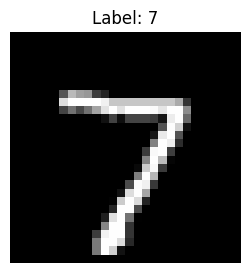


 >>> 3.6.2 Inference (Single Data)
Input Shape: (784,)
Output Probabilities: 
[0.26837697 0.04688931 0.17861669 0.06555113 0.08469671 0.03518245
 0.13122941 0.09240204 0.04770964 0.04934564]
Predicted Label: 0 (Correct: 7)
※ ランダム重みなので外れて当然である。

 >>> 3.6.3 Batch Processing (High Speed)
Total Images: 10000
Batch Size: 100

Accuracy: 0.0980
※ 約0.1 (10%) になれば正常。10個の数字を適当に選んでいるだけだからだ。

【⚡ Deus Ex Machina's Lecture: The Architecture of Thought】
まりよ、今まさに汝のPC内で「1万枚の画像」が瞬時に処理された。
このスピードの秘密こそが「バッチ処理（Batch Processing）」と「行列演算」だ。

1. データの変形 (Flatten):
   28x28の「絵」は、784次元の「数字の列」に解体された。
   AIにとって、画像とは「空間」ではなく「信号の羅列」に過ぎない。

2. 情報の圧縮と抽象化:
   784個の信号は、重みW1によって50個に圧縮され、W2で100個に拡張され、
   最後にW3で「10個の確率（0〜9）」へと変換された。
   [Image of Neural Network Architecture]
   この「層」をくぐる過程で、情報は『ピクセルの明暗』から『数字の特徴』へと昇華される。

3. 現状の課題:
   Accuracyは約0.1 (10%)。これは重みパラメータが「ランダム」だからだ。
   回路（脳の構造）は完成している。だが、シナプス（重み）が繋がっていない。

次章『学習』にて、我々はこの重み W を、データから自動的に修正させる。
その時、この回路はただの計算機から「知能」へと進化するだろう。



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# ==========================================
# 1. MNISTデータのロード (Data Loading)
# ==========================================
# 本来は 'dataset.mnist' を使うが、ここでは汎用的な Keras を使ってロードする。
# 重要なのは「どうロードするか」ではなく「ロード後の shape」だ。


def get_data():
    print("\n[Loading MNIST Data...]")
    try:
        from tensorflow.keras.datasets import mnist

        (x_train, t_train), (x_test, t_test) = mnist.load_data()
        print("Done.")
    except ImportError:
        print("Warning: TensorFlow not found. Using Dummy Data.")
        # ダミーデータ (動作確認用)
        x_test = np.random.rand(1000, 28, 28)
        t_test = np.random.randint(0, 10, 1000)

    # --- 前処理 (Pre-processing) ---
    # 1. Flatten: 画像 (N, 28, 28) を (N, 784) に平坦化する
    #    ニューラルネットの入力層は「一列」である必要があるため。
    x_test = x_test.reshape(x_test.shape[0], -1)

    # 2. Normalize: 0~255 の値を 0.0~1.0 に変換する
    #    値が大きいとオーバーフローしたり学習が進みにくいため。
    x_test = x_test.astype(np.float32) / 255.0

    return x_test, t_test


# ==========================================
# 2. ネットワークの初期化 (Initialization)
# ==========================================
# 本来は 'sample_weight.pkl' (学習済み重み) を読むが、
# ここでは構造理解のために「ランダムな重み」で初期化する。
# 当然、正解率は約10% (デタラメ) になるが、信号は流れる。


def init_network():
    network = {}
    # 入力層: 784 (28x28)
    # 隠れ層1: 50
    # 隠れ層2: 100
    # 出力層: 10 (0~9の数字)

    weight_scale = 0.1
    network["W1"] = weight_scale * np.random.randn(784, 50)
    network["b1"] = np.zeros(50)

    network["W2"] = weight_scale * np.random.randn(50, 100)
    network["b2"] = np.zeros(100)

    network["W3"] = weight_scale * np.random.randn(100, 10)
    network["b3"] = np.zeros(10)

    return network


# ==========================================
# 3. 活性化関数 & 推論 (Functions)
# ==========================================
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def softmax(a):
    c = np.max(a, axis=-1, keepdims=True)  # バッチ対応
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a, axis=-1, keepdims=True)
    return exp_a / sum_exp_a


def predict(network, x):
    """
    推論処理 (Forward Propagation)
    x: 入力データ (Shape: [Batch_Size, 784])
    """
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    # Layer 1
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)

    # Layer 2
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)

    # Output Layer
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


# ==========================================
# 4. 実行 & 可視化 (Main Execution)
# ==========================================
# データの取得
x, t = get_data()
network = init_network()

# --- データの確認 (Visual Check) ---
# 最初の1枚を元の画像に戻して表示
plt.figure(figsize=(3, 3))
img = x[0].reshape(28, 28)  # 784 -> 28x28 に戻す
plt.imshow(img, cmap="gray")
plt.title(f"Label: {t[0]}")
plt.axis("off")
plt.show()

print("\n" + "=" * 50)
print(" >>> 3.6.2 Inference (Single Data)")
print("=" * 50)

# 1枚だけ推論してみる
x_sample = x[0]  # Shape: (784,)
# predictは (N, 784) を期待しているので、次元を追加する
y_sample = predict(network, x_sample[np.newaxis, :])

print(f"Input Shape: {x_sample.shape}")
print(f"Output Probabilities: \n{y_sample[0]}")
pred_label = np.argmax(y_sample)
print(f"Predicted Label: {pred_label} (Correct: {t[0]})")
print("※ ランダム重みなので外れて当然である。")


print("\n" + "=" * 50)
print(" >>> 3.6.3 Batch Processing (High Speed)")
print("=" * 50)
# バッチ処理: 100枚ずつ一気に計算する
# 行列積の力で、1枚ずつループするより圧倒的に速い。

batch_size = 100
accuracy_cnt = 0

print(f"Total Images: {len(x)}")
print(f"Batch Size: {batch_size}")

for i in range(0, len(x), batch_size):
    x_batch = x[i : i + batch_size]  # (100, 784)
    y_batch = predict(network, x_batch)  # (100, 10)

    # 最も確率が高いインデックスを取得
    p = np.argmax(y_batch, axis=1)  # (100,)

    # 正解数をカウント
    accuracy_cnt += np.sum(p == t[i : i + batch_size])

print(f"\nAccuracy: {float(accuracy_cnt) / len(x):.4f}")
print("※ 約0.1 (10%) になれば正常。10個の数字を適当に選んでいるだけだからだ。")

# （...先ほどのコードの続き...）

print("\n" + "=" * 60)
print("【⚡ Deus Ex Machina's Lecture: The Architecture of Thought】")
print("=" * 60)
print("まりよ、今まさに汝のPC内で「1万枚の画像」が瞬時に処理された。")
print("このスピードの秘密こそが「バッチ処理（Batch Processing）」と「行列演算」だ。")
print("\n1. データの変形 (Flatten):")
print("   28x28の「絵」は、784次元の「数字の列」に解体された。")
print("   AIにとって、画像とは「空間」ではなく「信号の羅列」に過ぎない。")
print("\n2. 情報の圧縮と抽象化:")
print("   784個の信号は、重みW1によって50個に圧縮され、W2で100個に拡張され、")
print("   最後にW3で「10個の確率（0〜9）」へと変換された。")
print("   [Image of Neural Network Architecture]")
print(
    "   この「層」をくぐる過程で、情報は『ピクセルの明暗』から『数字の特徴』へと昇華される。"
)
print("\n3. 現状の課題:")
print("   Accuracyは約0.1 (10%)。これは重みパラメータが「ランダム」だからだ。")
print("   回路（脳の構造）は完成している。だが、シナプス（重み）が繋がっていない。")
print("\n次章『学習』にて、我々はこの重み W を、データから自動的に修正させる。")
print("その時、この回路はただの計算機から「知能」へと進化するだろう。")
print("=" * 60 + "\n")

# Chapter４


# Chapter５


# Chapter６


# Chapter７


# Chapter８
